# Ex

Carregue diferentes imagens digitais, com diferentes níveis e tipos de ruído.

Para cada imagem, aplique as seguintes operações de filtragem no domínio espacial:
1. Filtro da Média
2. Filtro da Mediana
3. Filtro Gaussiano
4. Filtro Passa-Alta
5. Filtro Passa-Baixa Gaussiano
6. Filtro Passa-Faixa Gaussiano

In [ ]:
import numpy as np
import math
import random
from skimage import data
import matplotlib.pyplot as plt

In [ ]:
# transform a rgb to gray
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [ ]:
# show image 1 and image 2
def show_img(img1, img2):
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)

  fig.add_subplot(1,2,1)
  plt.imshow(img1, cmap='gray')

  # display the new image
  fig.add_subplot(1,2,2)
  plt.imshow(img2, cmap='gray')

  plt.show(block=True)

In [ ]:
# add salt and pepper noise to image
def add_sp_noise(img, prob):
  img_n = np.zeros(img.shape, np.uint8)
  thres = 1 - prob 
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          rdn = random.random()
          if rdn < prob:
              img_n[i][j] = 0
          elif rdn > thres:
              img_n[i][j] = 255
          else:
              img_n[i][j] = img[i][j]
  return img_n

In [ ]:
# mean filter
def mean_filter(img):
  m, n = img.shape
  img_n = np.zeros([m, n])
  
  for i in range(1, m-1):
      for j in range(1, n-1):
        img_n[i, j] = int((img[i-1, j-1] + img[i-1, j] + img[i-1, j+1] + 
                          img[i, j-1]   + img[i, j]   + img[i, j+1] +
                          img[i+1, j-1] + img[i+1, j] + img[i+1, j+1]) / 9)
  return img_n.astype(np.uint8)

In [ ]:
# median filter
def median_filter(img):
  m, n = img.shape
  img_n = np.zeros([m, n])
  
  for i in range(1, m-1):
      for j in range(1, n-1):
          temp = [
                  img[i-1, j-1],
                  img[i-1, j],
                  img[i-1, j+1],
                  img[i, j-1],
                  img[i, j],
                  img[i, j+1],
                  img[i+1, j-1],
                  img[i+1, j],
                  img[i+1, j+1]]
            
          temp = sorted(temp)
          img_n[i, j]= temp[4]
    
  return img_n.astype(np.uint8)

In [ ]:
def gaussian_filter(img):
  m, n = img.shape
  img_n = np.copy(img)

  kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
		        [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
		        [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
		        [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
            [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

  offset = len(kernel) // 2
  
  for x in range(offset, m - offset):
    for y in range(offset, n - offset):
      acc = 0
      for a in range(len(kernel)):
        for b in range(len(kernel)):
          xn = x + a - offset
          yn = y + b - offset
          pixel = img[xn, yn]
          acc += pixel * kernel[a][b]
      img_n[x, y] = int (acc)

  return img_n.astype(np.uint8)

In [ ]:
def highpass_filter(img):
  m, n = img.shape
  img_n = np.copy(img)

  kernel = [[ -1 , -1 , -1 ],
            [ -1 ,  8 , -1 ],
            [ -1 , -1 , -1 ]]

  offset = len(kernel) // 2
  
  for x in range(offset, m - offset):
    for y in range(offset, n - offset):
      acc = 0
      for a in range(len(kernel)):
        for b in range(len(kernel)):
          xn = x + a - offset
          yn = y + b - offset
          pixel = img[xn, yn]
          acc += pixel * kernel[a][b]
      img_n[x, y] = int (acc)

  return img_n.astype(np.uint8)

In [ ]:
def low_pass_gaussian_filter(img):
  m, n = img.shape
  img_n = np.copy(img)

  kernel = [[1/16, 1/8, 1/16], 
            [1/8, 1/4, 1/8], 
            [1/16, 1/8, 1/16]]

  offset = len(kernel) // 2
  
  for x in range(offset, m - offset):
    for y in range(offset, n - offset):
      acc = 0
      for a in range(len(kernel)):
        for b in range(len(kernel)):
          xn = x + a - offset
          yn = y + b - offset
          pixel = img[xn, yn]
          acc += pixel * kernel[a][b]
      img_n[x, y] = int (acc)

  return img_n.astype(np.uint8) 

In [ ]:
# get test image
image_aux = data.camera()

In [ ]:
# add sp noise
image1 = add_sp_noise(image_aux, 0.05)

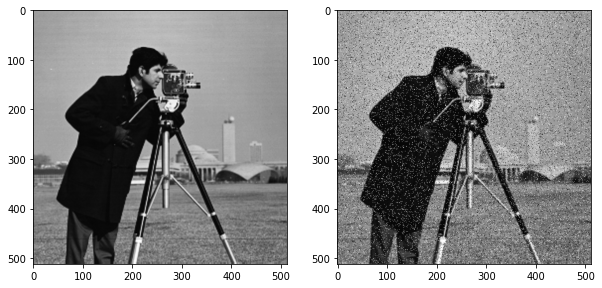

In [ ]:
# show images original and noisy
show_img(image_aux, image1)

In [ ]:
# filter image with mean filter
image1_mf = mean_filter(image1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


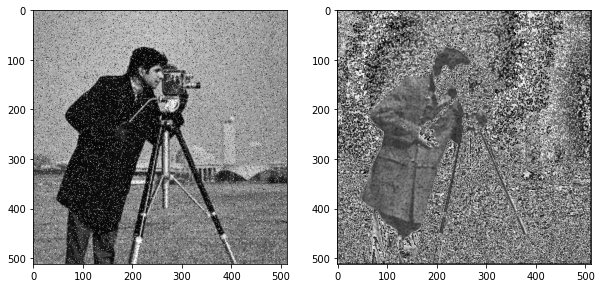

In [ ]:
# show new image after mean filter
show_img(image1, image1_mf)

In [ ]:
# filter image with median filter
image1_mef = median_filter(image1)

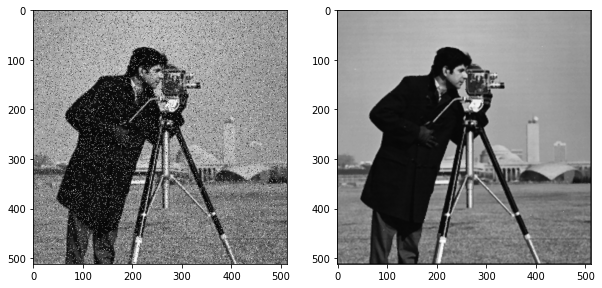

In [ ]:
# show new image after median filter
show_img(image1, image1_mef)

In [ ]:
# filter image with gaussian filter
image1_gaf = gaussian_filter(image1)

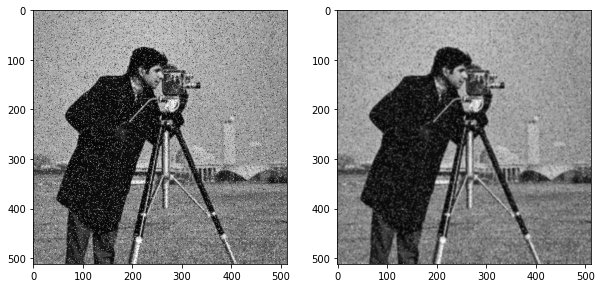

In [ ]:
# show new image after gaussian filter
show_img(image1, image1_gaf)

In [ ]:
# filter image with high pass filter
image1_hpf = highpass_filter(image1)

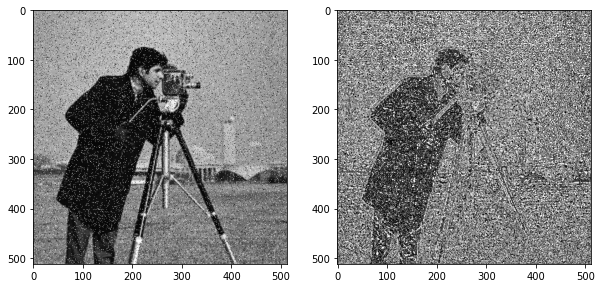

In [ ]:
# show new image after high pass filter
show_img(image1, image1_hpf)

In [ ]:
# filter image with low pass filter
image1_lpf = low_pass_gaussian_filter(image1)

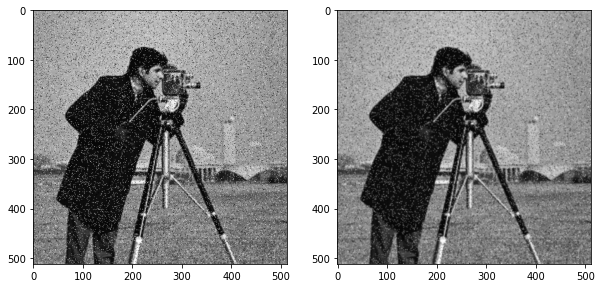

In [ ]:
# show new image after low pass filter
show_img(image1, image1_lpf)